# Исследовательский анализ данных о продаже видеоигр 


Обновленная версия данных о продажах видеоигр, взятая с Kaggle, включает дополнительные параметры: возрастные рейтинги, оценки пользователей и критиков. В рамках этого анализа мы изучим изменения на игровом рынке за годы и определим ключевые факторы, влияющие на успешный выпуск игры.


## Цели исследования

### 1. Анализ общих продаж и выпуска игр
- Определить динамику общего объема продаж и количества выпущенных игр за все время.

### 2. Жанровые предпочтения
- Определить самые популярные жанры по объему продаж.
- Выявить жанры с наивысшими средними оценками от критиков.

### 3. Влияние издателя
- Определить издателя с самым большим количеством проданных игр.
- Рассчитать общую выручку по издателям.

### 4. Региональные предпочтения
- Сравнить жанровые предпочтения в разных регионах.
- Проанализировать общую выручку и популярность платформ по регионам.

### 5. Влияние оценок критиков и пользователей
- Исследовать влияние оценок критиков и пользователей на выбор игр.


## Общая информация о датафрейме

#### Загрузка и предобработка данных

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt

In [3]:
game_sales = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [4]:
game_sales

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
game_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


Описание данных :
* Name - Название игры

* Platform - Платформа на которую выпустили игру

* Year_of_Release - Год выпуска игры

* Genre - Жанр 

* Publisher - Издатель

* NA_Sales - Продажи в Северной Америке  (в млн)

* EU_Sales - Продажи в Европе (в млн)

* JP_Sales - Продажи в Японии (в млн)

* Other_Sales - Продажи в других регионах (в млн)

* Global_Sales - Общие продажи (в млн)

* Critic_score - Оценка игры от критика взятая с метакритика

* Critic_count - Количество критиков учавствующих в оценке

* User_score - Оценка игры от пользователей

* User_count - Количество пользователей учавствующих в оценке

* Developer - Компания которая создала игру

* Rating - Возрастной рейтинг игры

In [7]:
game_sales.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

В столбцах Year и Publisher обнаружены пропуски, что критично, так как эти данные являются ключевыми для анализа. Необходимо понять причины их появления и устранить.

Также в новых столбцах выявлено множество пропущенных значений. Особое внимание следует обратить на столбец User_Score, где, помимо пропусков, тип данных указан как object. Чтобы избежать ошибок в дальнейшем анализе, необходимо преобразовать Year_of_Release и User_Score в формат int.

Вероятно, значительная часть пропусков связана с тем, что сайт Metacritic появился только в 2001 году, и данные за предыдущие годы отсутствуют.


### Предобработка данных

#### Замена имен

In [8]:
game_sales.columns = game_sales.columns.str.lower()

#### Удаление пропущенных значений и смена типа данных

In [9]:
game_sales['year_of_release'] = game_sales['year_of_release'].fillna(0).astype('int64')
game_sales = game_sales[game_sales['year_of_release'] != 0]

In [10]:
game_sales['publisher'] = game_sales['publisher'].fillna(0)
game_sales = game_sales[game_sales['publisher'] != 0]

/var/folders/7r/1rktrkc904jb_w5jbh5zc54m0000gn/T/ipykernel_60008/2887016925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_sales['publisher'] = game_sales['publisher'].fillna(0)


In [11]:
game_sales.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
publisher             0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
global_sales          0
critic_score       8436
critic_count       8436
user_score         6581
user_count         8957
developer          6514
rating             6651
dtype: int64

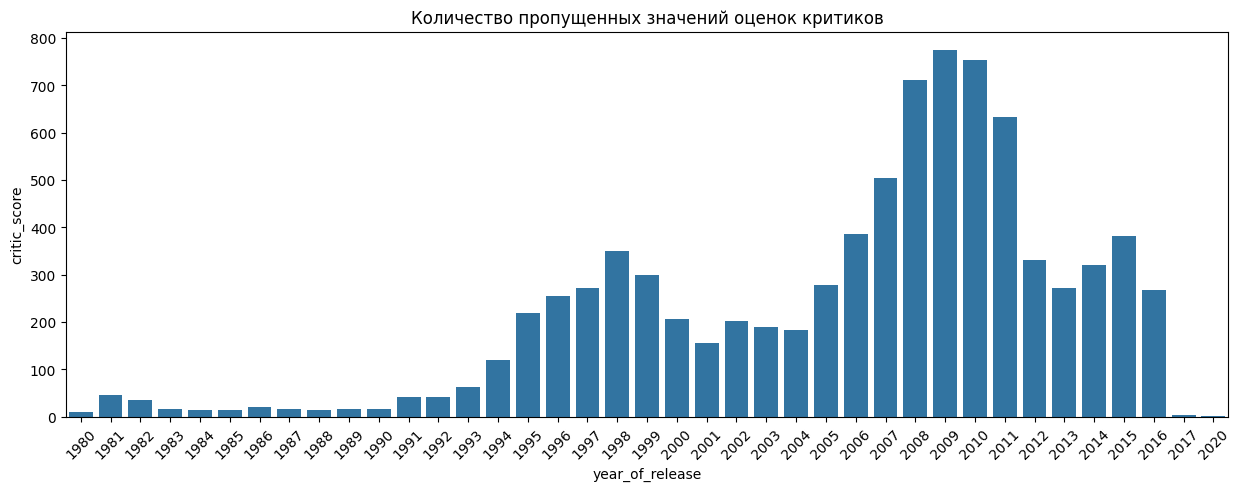

In [12]:
missing_data = game_sales.groupby(['year_of_release']).agg({'critic_score' : lambda x: x.isnull().sum()})
plt.figure(figsize=(15, 5))
sns.barplot(data=missing_data, x='year_of_release', y='critic_score')

plt.title('Количество пропущенных значений оценок критиков')
plt.xticks(rotation=45)  
plt.show()


Мои предположения об упущенных данных не подтвердились, самое большое количество пропусков есть в период с 2006 по 2012. Необходимо убрать их из данных.

In [13]:
game_sales = game_sales.dropna(subset=['critic_score'])
game_sales['critic_score'] = game_sales['critic_score'].astype(int)
game_sales.critic_score.value_counts()

critic_score
70    252
71    248
75    240
80    235
73    234
     ... 
20      3
29      3
21      1
17      1
13      1
Name: count, Length: 81, dtype: int64

In [14]:
game_sales.user_score.value_counts()

user_score
tbd    1056
7.8     296
8       262
8.2     261
8.5     239
       ... 
9.6       2
0.6       1
0.9       1
1.3       1
0.7       1
Name: count, Length: 90, dtype: int64

In [15]:
game_sales['user_score'] = game_sales['user_score'].fillna(0)
game_sales = game_sales[(game_sales['user_score'] != 0) & (game_sales['user_score'] != 'tbd')]
game_sales['user_score'] = game_sales['user_score'].astype(float)
game_sales['user_score'] = (game_sales['user_score'] * 10).astype(int)

Приводим user_score к 100 бальной системе оценивания и избавляемся от пропущенных значений

In [16]:
game_sales.rating.value_counts()

rating
T       2377
E       2082
M       1433
E10+     930
AO         1
K-A        1
RP         1
Name: count, dtype: int64

In [17]:
game_sales['rating'] = game_sales['rating'].replace({'T' : '13+', 'E' : '6+', 'M' : '18+', 'E10+' : '10+', 'AO' : '18+', 'K-A' : '6+'})
game_sales = game_sales[game_sales['rating'] != 'RP']
game_sales = game_sales.dropna(subset=['rating'])


game_sales.rating.value_counts()

rating
13+    2377
6+     2083
18+    1434
10+     930
Name: count, dtype: int64

Преобразуем возрастной рейтинг к более понятному виду и уберем RP, так как это ожидание установления рейтинга

In [18]:
game_sales.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51.0,80,322.0,Nintendo,6+
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73.0,83,709.0,Nintendo,6+
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73.0,80,192.0,Nintendo,6+
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89,65.0,85,431.0,Nintendo,6+
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58,41.0,66,129.0,Nintendo,6+


Данные подготовлены к анализу: мы устранили пропуски, сохранив строки, привели типы данных к нужным форматам и стандартизировали названия столбцов, преобразовав их в нижний регистр. Для удобства восприятия также улучшили читаемость столбца rating.

## Исследовательский анализ данных

### Анализ выпущенного количества видеоигр и общих продаж за все время

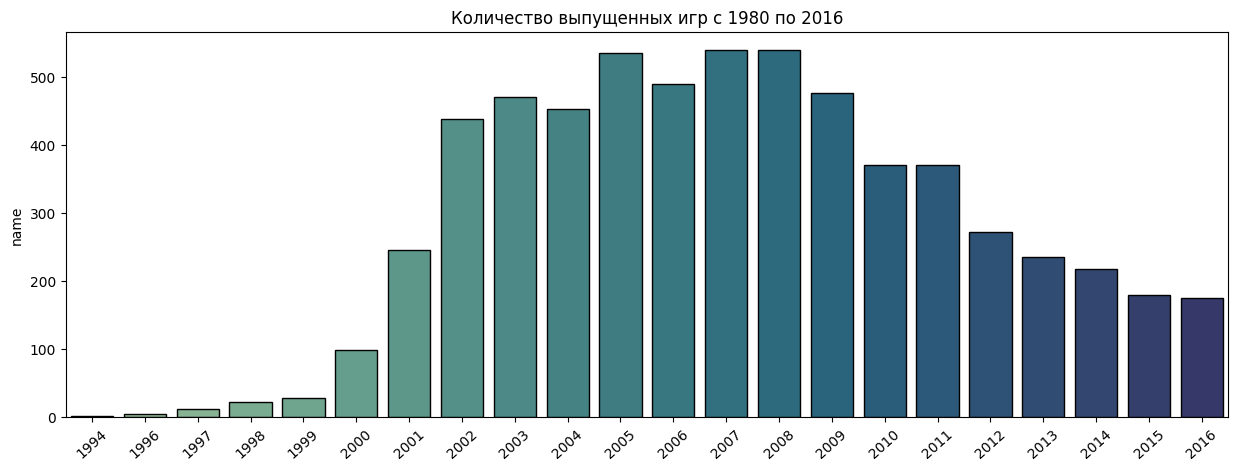

In [49]:
releases_per_year = game_sales.groupby('year_of_release')['name'].count().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(data=releases_per_year, x='year_of_release', y='name', edgecolor='black', palette= 'crest', hue = 'year_of_release', legend=False)

plt.title('Количество выпущенных игр с 1980 по 2016')
plt.xticks(rotation=42)
plt.xlabel('')

plt.show()

Начиная с 2000 года наблюдается значительный рост количества выпущенных игр, достигший пика в период с 2005 по 2009 годы, с максимальным значением в 2008 году. Однако, начиная с 2012 года, виден спад, который, вероятно, связан с выпуском новых игровых консолей и стремительным развитием рынка мобильных игр.

/var/folders/7r/1rktrkc904jb_w5jbh5zc54m0000gn/T/ipykernel_60008/614570971.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=global_sales_per_platform, x='global_sales', y='platform', edgecolor='black', palette= 'mako')


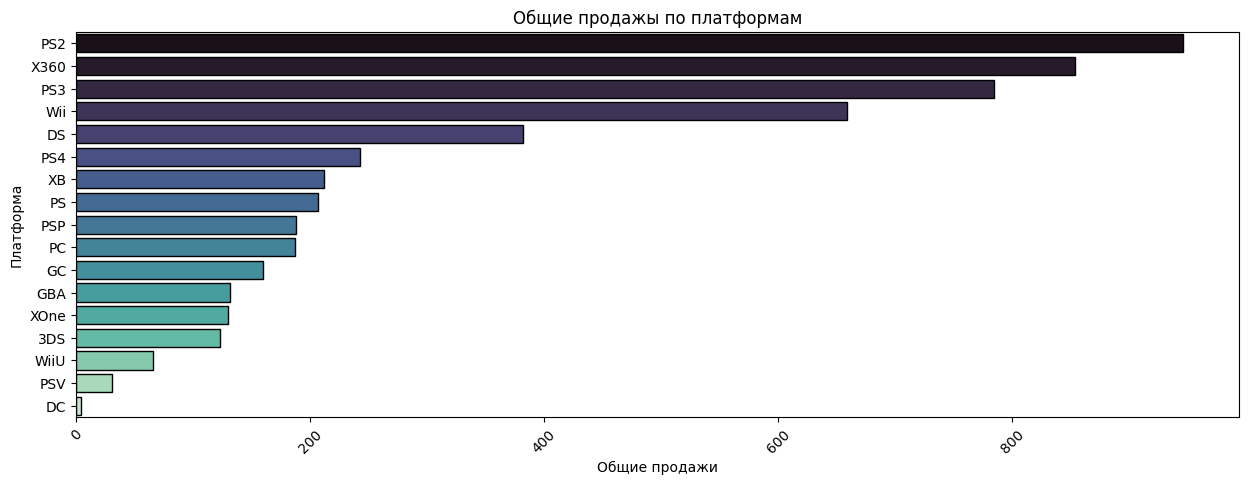

In [ ]:
global_sales_per_platform = game_sales.groupby(['platform'], as_index=False).agg({'global_sales' : 'sum'})\
.sort_values(['global_sales'], ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(data=global_sales_per_platform, x='global_sales', y='platform', edgecolor='black', palette= 'mako', hue = 'platform', legend=False)

plt.title("Общие продажы по платформам")
plt.xlabel("Общие продажи")
plt.ylabel("Платформа")
plt.xticks(rotation=45)
plt.show()

По самим платформам абсолютный лидер это PS2, за ним идет Xbox 360 и PS3. Давайте взглянем на жизненный цикл каждой платформы

In [21]:
first_release_year = game_sales.groupby('platform')['year_of_release'].agg('min').reset_index()
last_release_year = game_sales.groupby('platform')['year_of_release'].agg('max').reset_index()
total_global_sales = game_sales.groupby('platform')['global_sales'].sum().reset_index()

release_years = pd.merge(first_release_year, last_release_year, on='platform', suffixes=('_first', '_last'))
release_years = pd.merge(release_years, total_global_sales, on='platform')
release_years['life_cycle'] = release_years['year_of_release_last'] - release_years['year_of_release_first']

In [22]:
release_years.sort_values(['life_cycle'], ascending=False)

,platform,year_of_release_first,year_of_release_last,global_sales,life_cycle
5,PC,1985,2016,187.09,31
7,PS2,2000,2010,945.97,10
8,PS3,2006,2015,784.30,9
14,X360,2005,2014,853.30,9
10,PSP,2004,2013,187.92,9
2,DS,2004,2012,382.33,8
6,PS,1994,2002,206.55,8
15,XB,2000,2007,212.07,7
4,GC,2001,2007,159.42,6
12,Wii,2006,2012,658.98,6


Так как данные только до 2016 некоторые жизненные циклы указанны некоректно, к примеру для Xbox One и Ps4

<Axes: xlabel='life_cycle'>

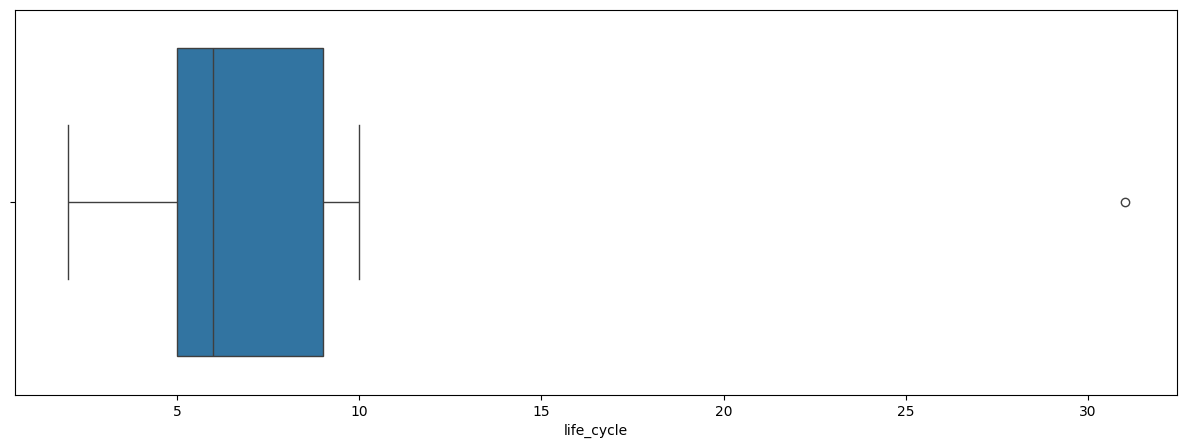

In [23]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=release_years['life_cycle'], orient= 'h')

На графике есть выброс относящийся к платформе пк, считаю целесообразным исключить пк из данных, так как по сути данная платформа всегда будет существовать в связи с заменой только комплектующих.

In [24]:
game_sales = game_sales.query(' platform != "PC" ')
release_years = release_years.query(' platform != "PC" ')

print('Средний жизненный цикл :' ,release_years['life_cycle'].mean())
print('Медианный жизненный цикл :' , release_years['life_cycle'].median())


Средний жизненный цикл : 6.1875
Медианный жизненный цикл : 6.0


In [25]:
releases_per_platform = game_sales.query(' platform != "PC" ').groupby(['platform'], as_index=False).agg({'name' : 'count' , 'global_sales' : 'sum'})\
    .sort_values(['name'], ascending=False).rename(columns={'name' : 'amount_of_releases'})
releases_per_platform

,platform,amount_of_releases,global_sales
6,PS2,1140,945.97
13,X360,858,853.30
7,PS3,769,784.30
14,XB,565,212.07
11,Wii,479,658.98
2,DS,464,382.33
9,PSP,390,187.92
4,GC,348,159.42
8,PS4,239,243.03
3,GBA,237,131.75


На таблице видно, что у PS2 самое большое количество выпущенных игр, что могло повлиять на такую востребованность у покупателей. Для более глубокого анализа нам необходимы данные по цене платформы.

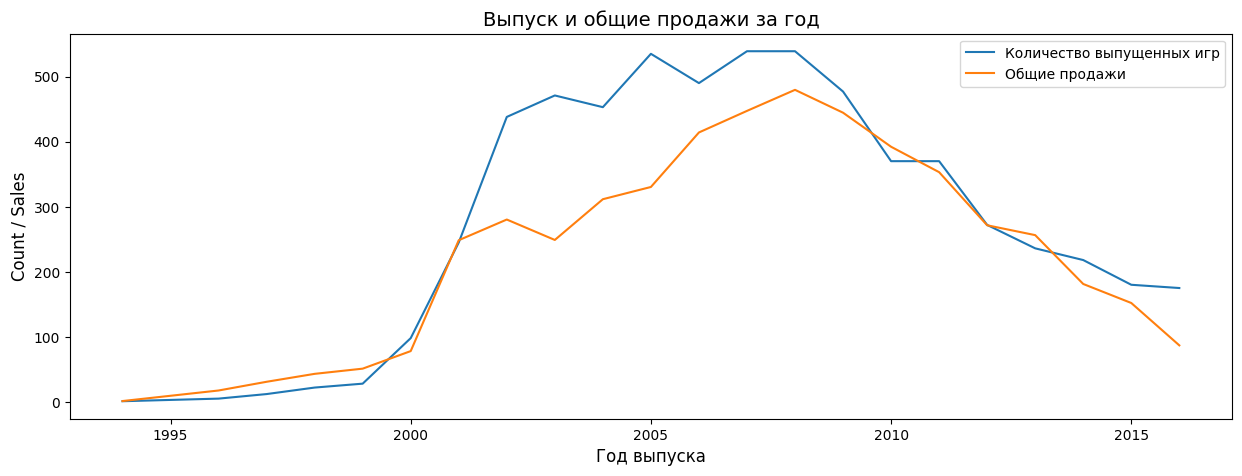

In [26]:
releases_and_global_sales_per_year = game_sales.query('platform != "PC"').groupby(['year_of_release'],as_index=False)\
    .agg({'name' : 'count', 'global_sales' : 'sum'})
releases_and_global_sales_per_year

plt.figure(figsize=(15, 5))
sns.lineplot(
    data=releases_and_global_sales_per_year,
    x='year_of_release',  
    y='name',             
    label='Количество выпущенных игр'
)
sns.lineplot(
    data=releases_and_global_sales_per_year,
    x='year_of_release',  
    y='global_sales',     
    label='Общие продажи'
)

plt.title('Выпуск и общие продажи за год', fontsize=14)
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Count / Sales', fontsize=12)
plt.legend()
plt.show()

## Жанровые предпочтения

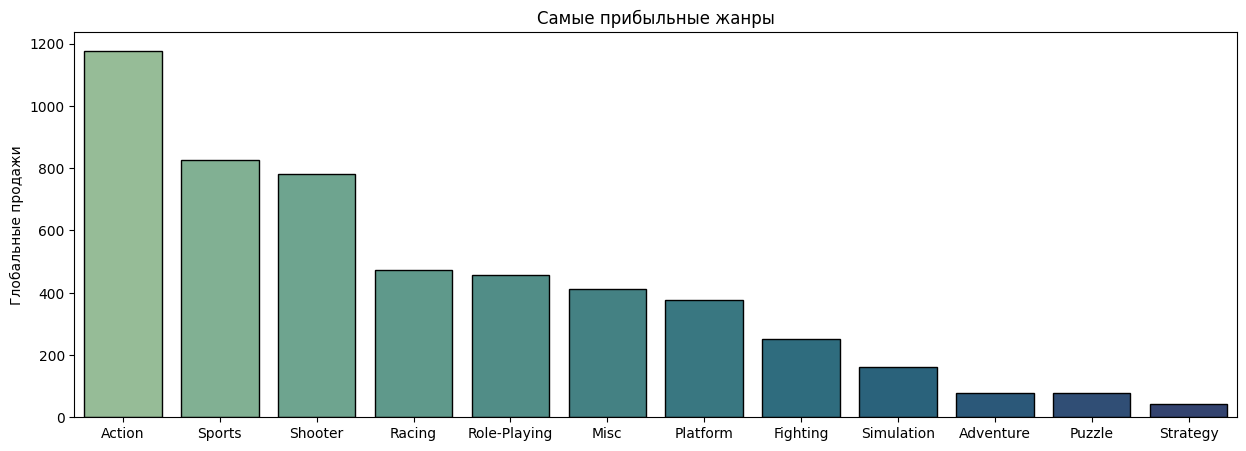

In [48]:
sales_by_genre = game_sales.groupby('genre')['global_sales'].sum().reset_index()

sales_by_genre = sales_by_genre.sort_values(by='global_sales', ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(data=sales_by_genre, x='genre', y='global_sales', edgecolor='black', palette='crest', hue = 'genre', legend=False)

plt.title('Самые прибыльные жанры')
plt.xlabel('')
plt.ylabel('Глобальные продажи')

plt.show()

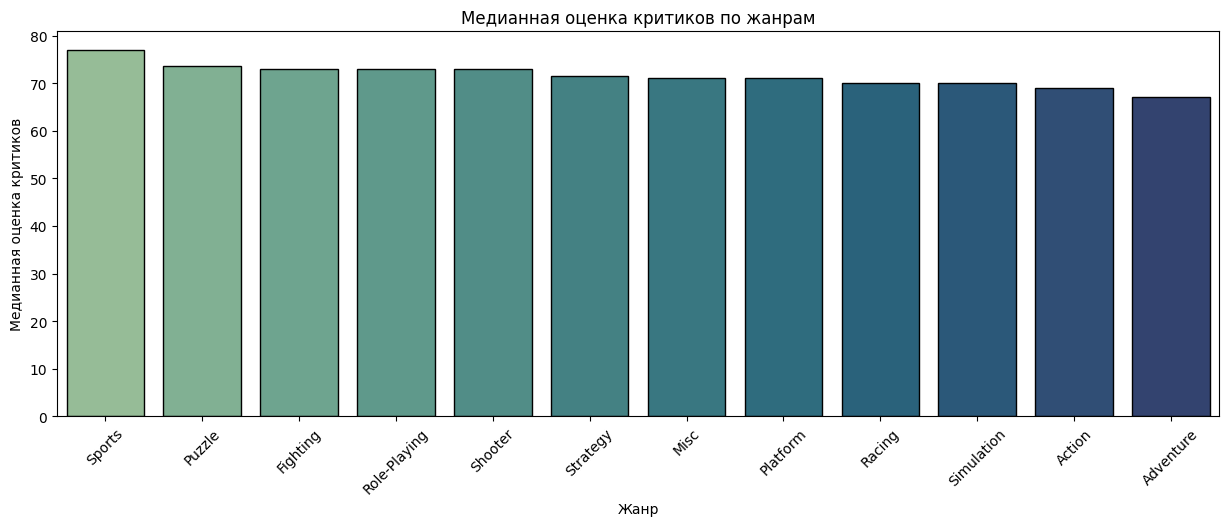

In [47]:
genre_sales_by_score = game_sales.groupby(['genre']).agg({'critic_score' : 'median' }).sort_values(['critic_score'], ascending=False)

plt.figure(figsize=(15, 5))
sns.barplot(data=genre_sales_by_score, x="genre", y="critic_score", palette="crest", edgecolor = 'black', hue = 'genre', legend=False)

plt.title("Медианная оценка критиков по жанрам")
plt.xlabel("Жанр")
plt.ylabel("Медианная оценка критиков")
plt.xticks(rotation=45)
plt.show()

Самый популярный жанр это экшен, затем идет спорт и шутер. Самая высокая средная оценка от критиков у жанра спорт.

## Поиск лучшего издателя

/var/folders/7r/1rktrkc904jb_w5jbh5zc54m0000gn/T/ipykernel_60008/854947341.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


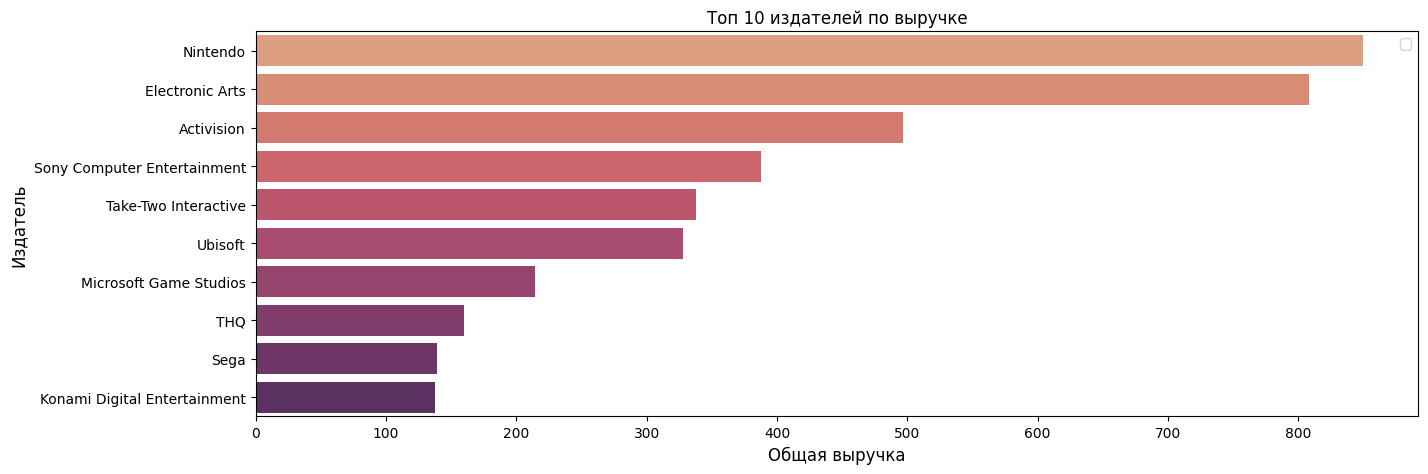

In [46]:
best_publisher_by_sales = game_sales.groupby(['publisher']).agg({'global_sales' : 'sum'}).sort_values(['global_sales'], ascending= False).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(data = best_publisher_by_sales, y = 'publisher', x = 'global_sales', palette= 'flare', hue = 'publisher', legend=False)

plt.title("Топ 10 издателей по выручке")
plt.xlabel('Общая выручка', fontsize=12)
plt.ylabel('Издатель', fontsize=12)
plt.legend()
plt.show()

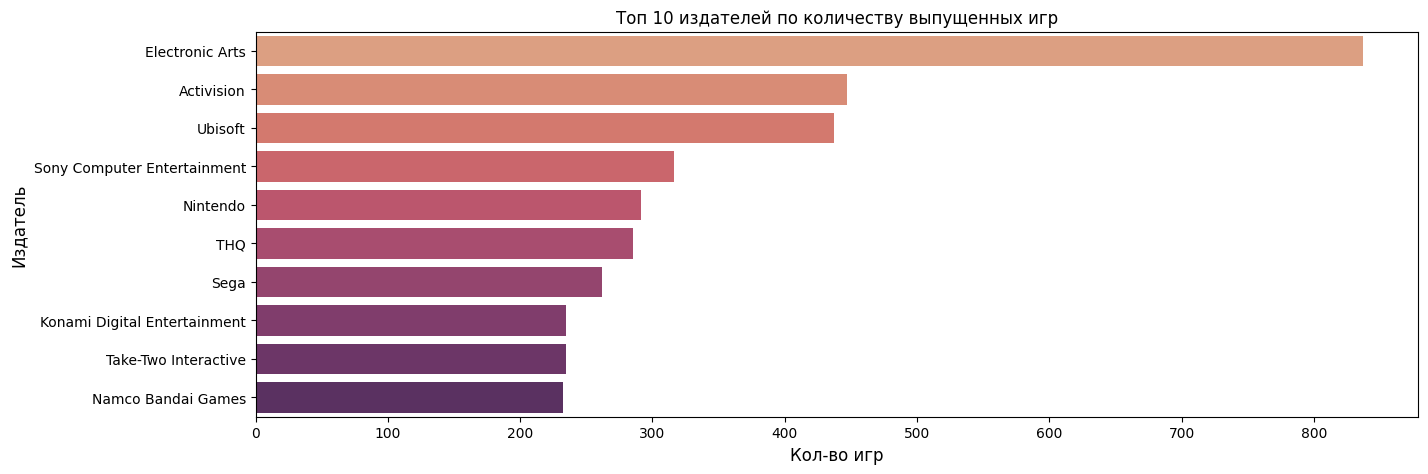

In [45]:
best_publisher_by_amount_of_games = game_sales.groupby(['publisher']).agg({'name' : 'count'}).sort_values(['name'], ascending= False).head(10)

plt.figure(figsize=(15, 5))
sns.barplot(data = best_publisher_by_amount_of_games, y = 'publisher', hue= 'publisher', x = 'name', palette= 'flare', legend=False )

plt.title("Топ 10 издателей по количеству выпущенных игр")
plt.xlabel('Кол-во игр', fontsize=12)
plt.ylabel('Издатель', fontsize=12)
plt.show()

## Региональные предпочтения

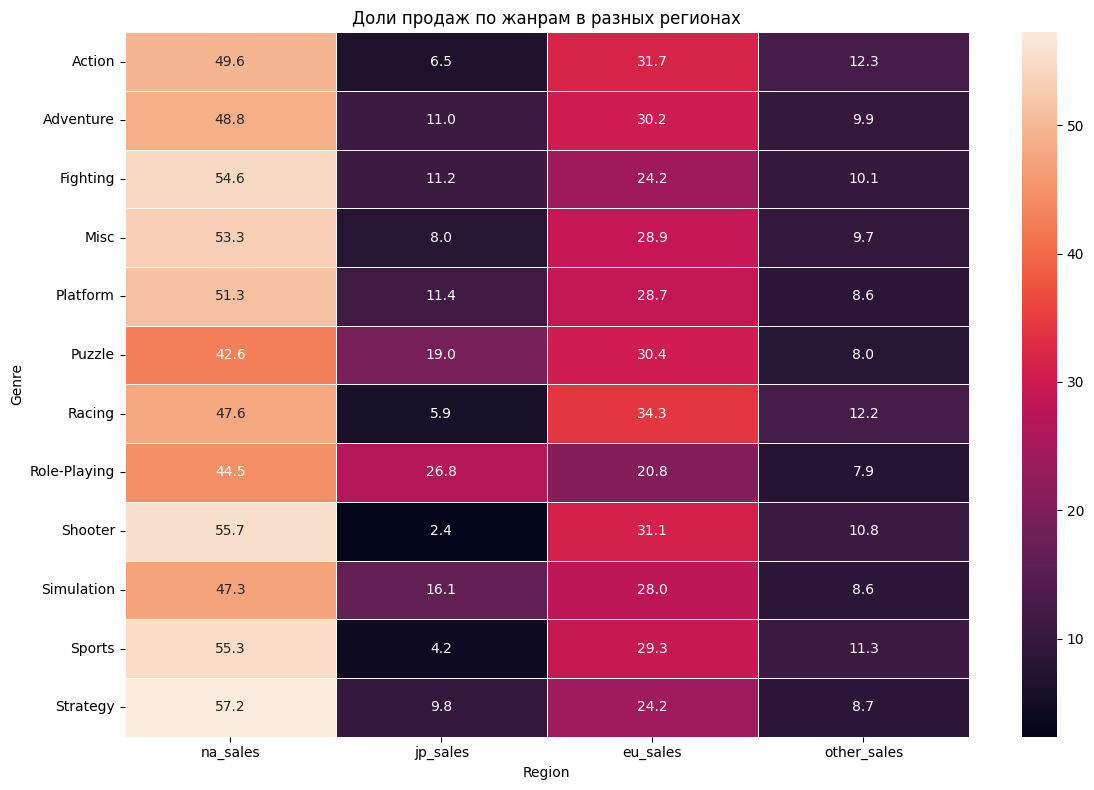

In [31]:
genre_sales = game_sales.groupby('genre')[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].sum()

genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(genre_sales_normalized, cmap='rocket', annot=True, fmt='.1f', linewidths=.5)
plt.title('Доли продаж по жанрам в разных регионах')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Большая часть продаж приходится на регион Северной Америки и Европы

In [32]:
def process_region_sales(group_col):
    grouped_data = game_sales.groupby(group_col)[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']].sum()

    region_sales_melted = (
        grouped_data.reset_index()
        .melt(id_vars=group_col, var_name='region', value_name='sales')
    )

    region_sales_sorted = region_sales_melted.sort_values(['region', 'sales'], ascending=[True, False])
    
    return region_sales_sorted


Сделаем функцию для более удобной группировки данных и уменьшения повторений в будущем

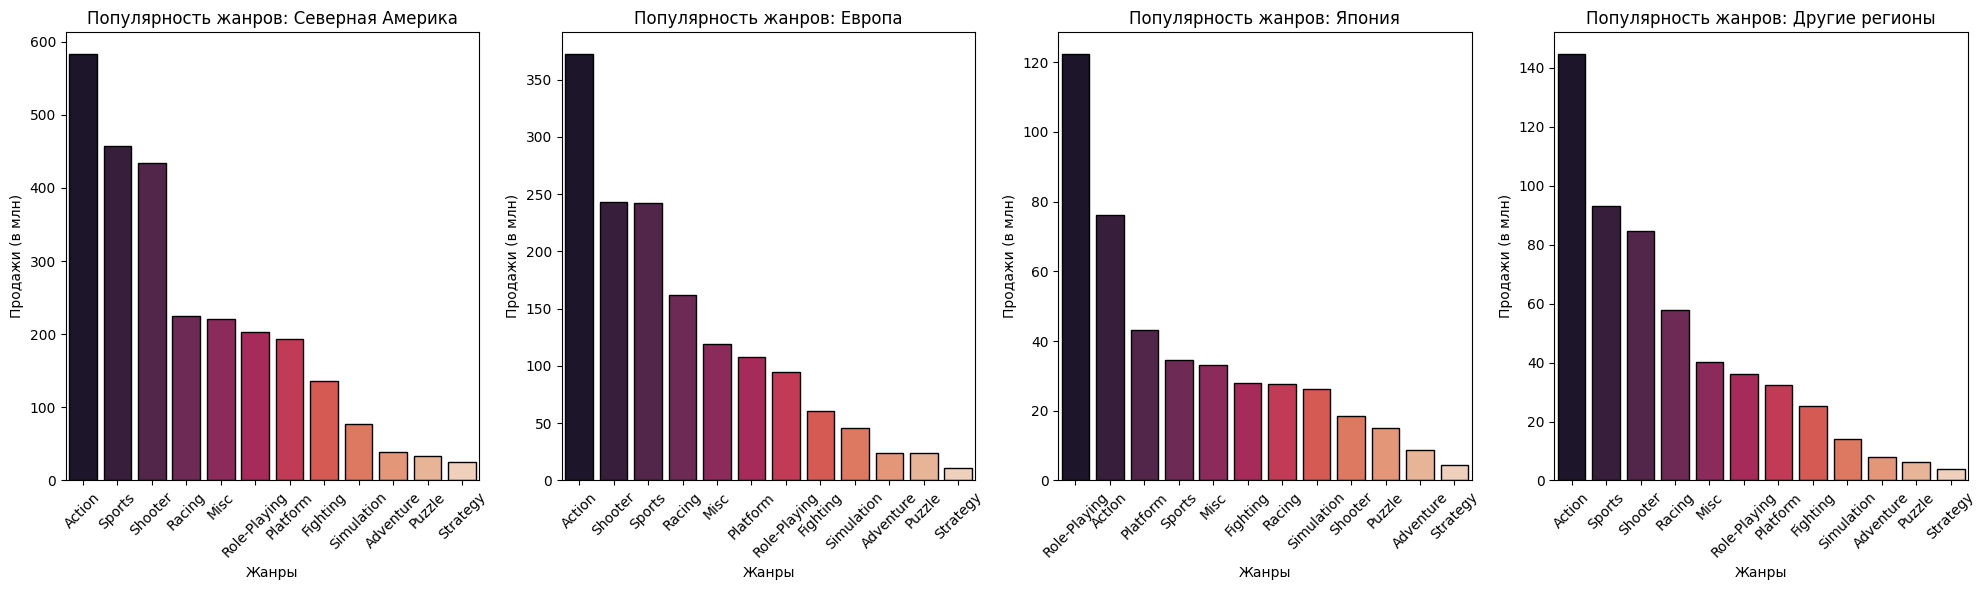

In [50]:
region_sales_sorted = process_region_sales(group_col='genre')

regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
titles = ['Северная Америка', 'Европа', 'Япония', 'Другие регионы']

plt.figure(figsize=(20, 6))  

for i, region in enumerate(regions):
    plt.subplot(1, 4, i + 1)  
    data = region_sales_sorted[region_sales_sorted['region'] == region]  
    sns.barplot(data=data, y='sales', x='genre', palette='rocket', edgecolor='black', hue = 'genre', legend=False)
    plt.title(f'Популярность жанров: {titles[i]}')
    plt.xlabel('Жанры')
    plt.ylabel('Продажи (в млн)')
    plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


В целом, предпочтения по жанрам в разных регионах схожи: лидером является жанр экшен, за которым следуют спорт или шутеры. Исключение составляет Япония, где наибольшей популярностью пользуются игры жанра RPG.

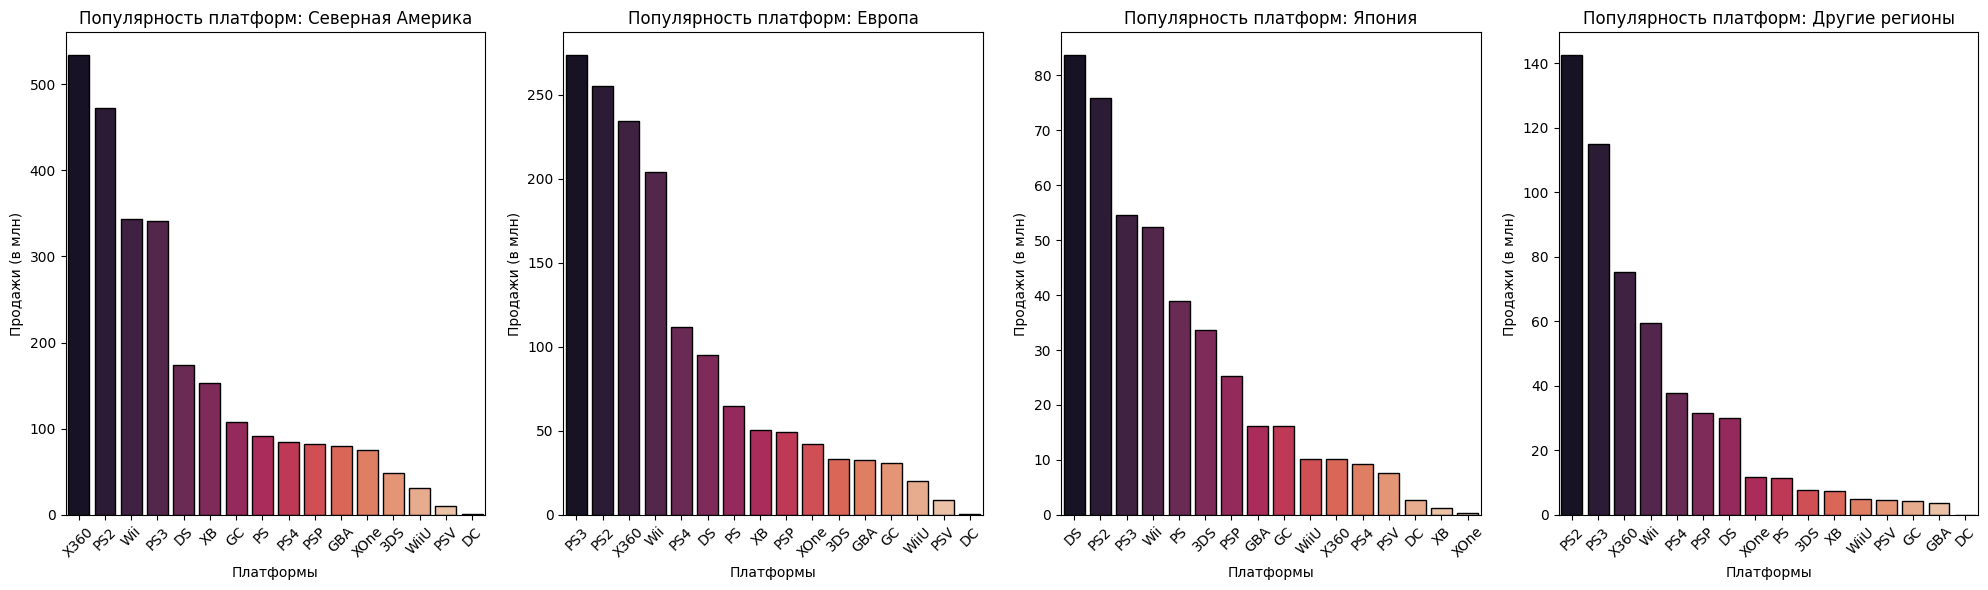

In [52]:
region_sales_sorted = process_region_sales(group_col='platform')

regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
titles = ['Северная Америка', 'Европа', 'Япония', 'Другие регионы']

plt.figure(figsize=(20, 6))  

for i, region in enumerate(regions):
    plt.subplot(1, 4, i + 1)  
    data = region_sales_sorted[region_sales_sorted['region'] == region]  
    sns.barplot(data=data, y='sales', x='platform', palette='rocket', edgecolor='black', hue = 'platform', legend=False)
    plt.title(f'Популярность платформ: {titles[i]}')
    plt.xlabel('Платформы')
    plt.ylabel('Продажи (в млн)')
    plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()


В Северной Америке на первом месте xbox 360, в Японии на первом месте DS. В остальных регионах на первых местах либо ps2 либо ps3.

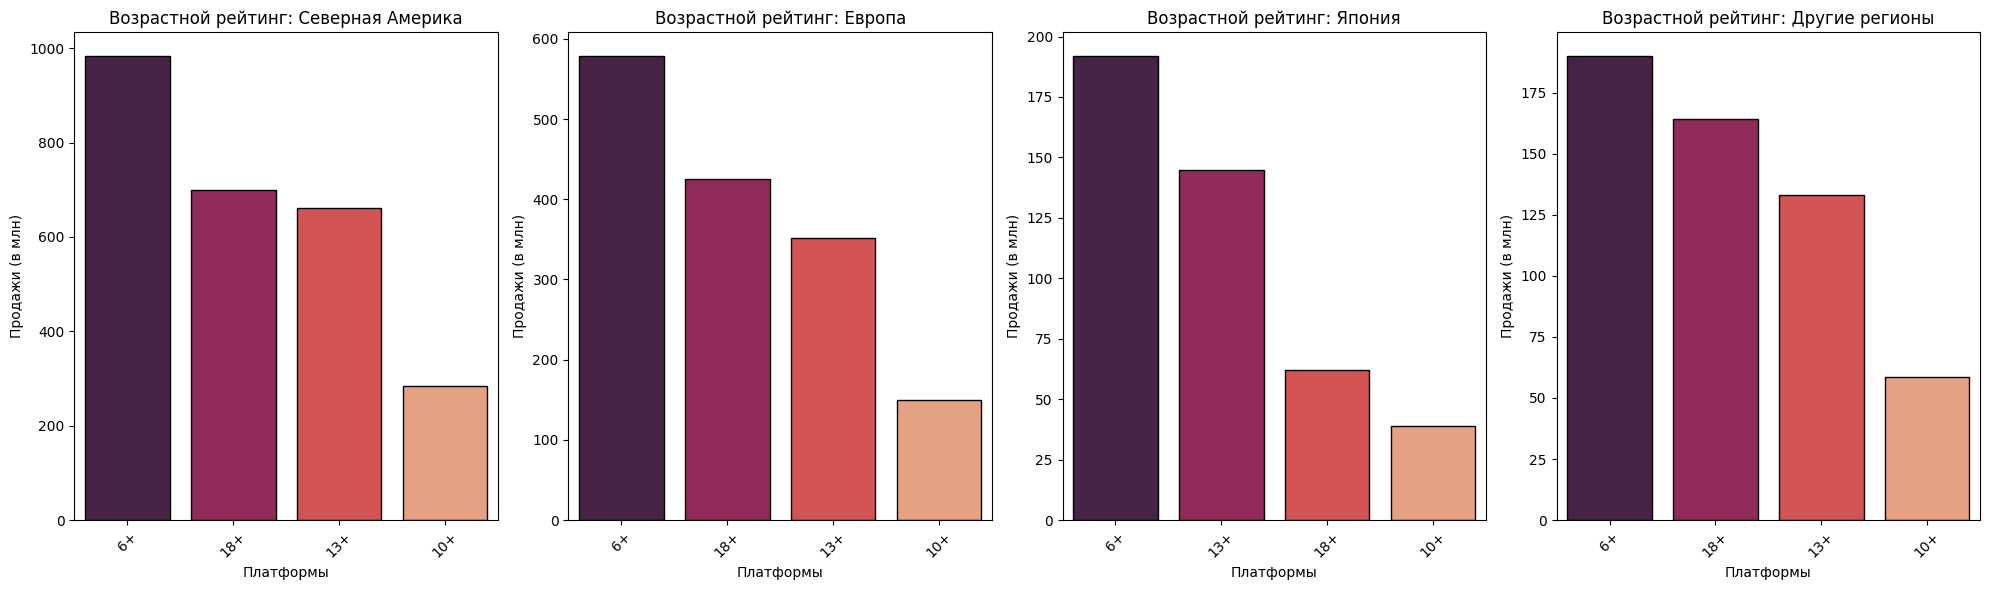

In [53]:
region_sales_sorted = process_region_sales(group_col='rating')

regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
titles = ['Северная Америка', 'Европа', 'Япония', 'Другие регионы']

plt.figure(figsize=(20, 6))  

for i, region in enumerate(regions):
    plt.subplot(1, 4, i + 1)  
    data = region_sales_sorted[region_sales_sorted['region'] == region]  
    sns.barplot(data=data, y='sales', x='rating', palette='rocket', edgecolor='black', hue = 'rating', legend=False)
    plt.title(f'Возрастной рейтинг: {titles[i]}')
    plt.xlabel('Платформы')
    plt.ylabel('Продажи (в млн)')
    plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

По возрастному рейтингу картина во всех регионах одинаковая 

### Анализ связи между оценкой критиков, пользователей с общими продажами

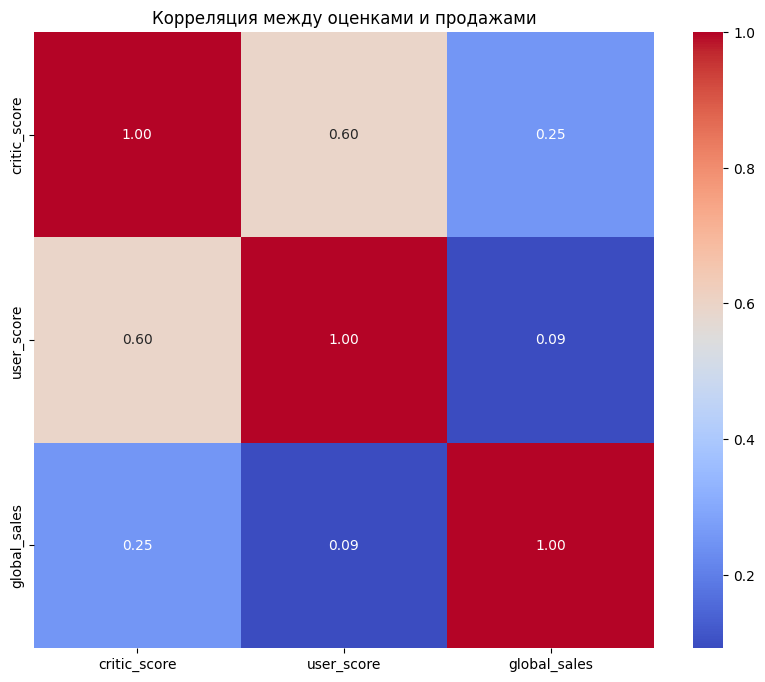

In [55]:
correlations = game_sales[["critic_score", "user_score", "global_sales"]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция между оценками и продажами")
plt.show()

Мы видим очень слабую корреляцию между оценками критиков и пользователей с глобальными продажами, что указывает на ограниченное влияние оценок на объемы продаж. Однако корреляция между оценками критиков и пользователей относительно высокая, что объясняется их схожими подходами к оцениванию игр.

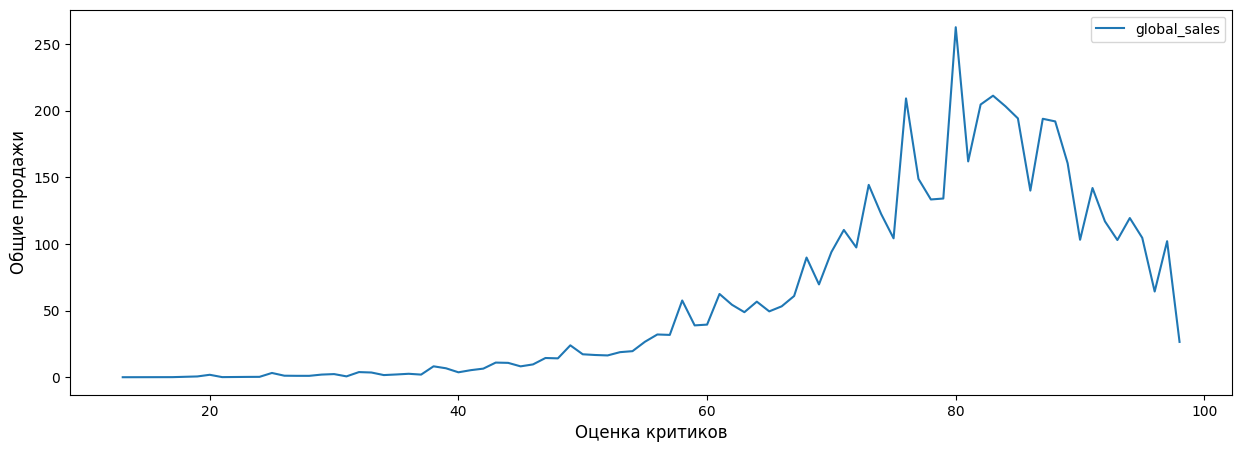

In [ ]:
games_score_critics = game_sales.groupby(['critic_score']).agg({'global_sales' : 'sum'}).sort_values(['global_sales'], ascending=False)
games_score_users = game_sales.groupby(['user_score']).agg({'global_sales' : 'sum'}).sort_values(['global_sales'], ascending=False)

plt.figure(figsize=(15, 5))
sns.lineplot(games_score_critics)

plt.title('', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Общие продажи', fontsize=12)
plt.legend()
plt.show()


Видно что продажи начинают уменьшаться ближе к 90, скорее всего такие оценки получало в целом не так много игр и в связи с этим идет падение 

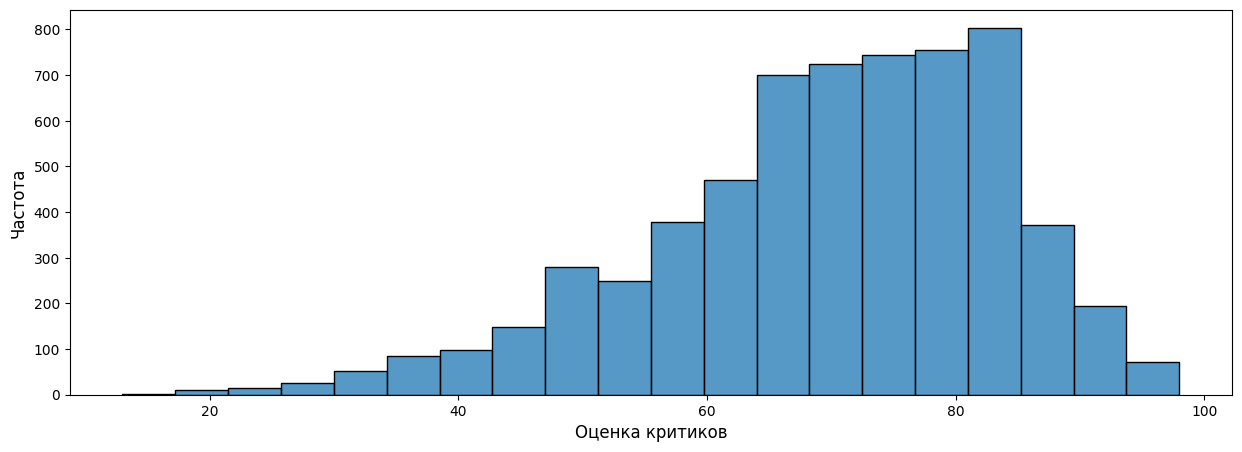

In [56]:
plt.figure(figsize=(15, 5))
sns.histplot(game_sales['critic_score'], bins= 20)

plt.title('', fontsize=14)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

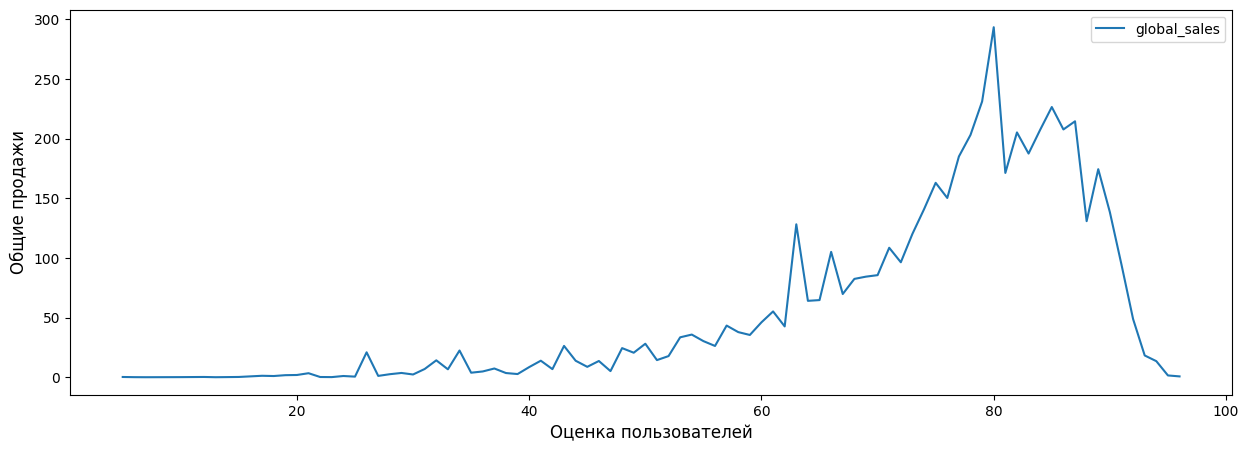

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(games_score_users)

plt.title('', fontsize=14)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Общие продажи', fontsize=12)
plt.legend()
plt.show()

## Выводы

### Общие тренды

С 2000 года наблюдается значительный рост производства видеоигр, пик которого пришелся на период с 2005 по 2009 годы. Начиная с 2012 года, производство начало снижаться. Наиболее успешной платформой за все время является PlayStation 2 (PS2), за которой следуют Xbox 360 и PlayStation 3 (PS3). Также высоких результатов добились японские платформы Wii и DS.

### Региональные различия

Северная Америка приносит около 50% всей прибыли в индустрии видеоигр, значительно опережая другие регионы. Уникальные жанровые предпочтения наблюдаются в Японии, где самым прибыльным жанром является RPG (ролевые игры).

### Рекомендации для выпуска игр

На момент актуальности данных лучшим выбором для выпуска новой игры является жанр экшен или шутер с возрастным рейтингом 13+ и выше. Из платформ наибольшую популярность имеют PlayStation 4 (PS4) и Xbox One, однако PS4 значительно опережает конкурента по продажам. Согласно исследованным данным, игры с такими параметрами обладают наибольшим коммерческим успехом. 


### Данные и перспективы исследования

Для анализа использовались данные с 1980 по 2016 год, так как они наиболее полны и качественны. Актуальные данные на сегодняшний день имеют ограниченный объем выборки и содержат значительные пропуски. В связи с интересом к теме, в будущем я планирую продолжить анализ, используя обновленные данные, чтобы выявить современные тренды в игровой индустрии. 